In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt


import time


In [6]:
train=pd.read_csv('totalsale2019.csv')
train

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Task 1: Import packages and load data


In [2]:
path='/Users/DAT/Desktop/Sales Reporting/'
df=pd.read_csv(path+'sales2019_1.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


Task 2: Clean  and Preprocess Data

Task 2.1 Merge 12 months data

In [53]:
from numpy import append
from pandas import concat


frame= []
s_length=[]
for file in os.listdir(path):
    if (file.endswith('.csv')):
        filepath=path+file
        df1=pd.read_csv(filepath) 
        frame.append(df1)
        result=concat(frame)
        df2=len(df1.index)
        s_length.append(df2)


df=result
df.to_csv('totalsale2019.csv')


        




Task 2.2 Add 'months' column

In [54]:

df['months']=df['Order Date'].str[0:2]
df



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


Task 2.3 Get rid of 'NaN' and 'Or' value 

In [55]:
print(set(df['months']))

{'02', '11', '04', '07', '06', '01', '10', '03', nan, '08', 'Or', '12', '05', '09'}


In [56]:
df=df.dropna(how='all')
df=df[df['months']!='Or']


Task 3: Reporting

Task 3.1: What was the best month for sale 


In [57]:
#Add productsales column
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'],downcast='integer')

df['Price Each']=pd.to_numeric(df['Price Each'],downcast='float')

df['productsale']=df['Quantity Ordered']*df['Price Each']
from pandas.core.groupby import groupby


sale_month=df.groupby('months').sum()['productsale']
sale_month










   

C:\Users\DAT\AppData\Local\Temp\ipykernel_19888\2394845506.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_month=df.groupby('months').sum()['productsale']


months
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: productsale, dtype: float32

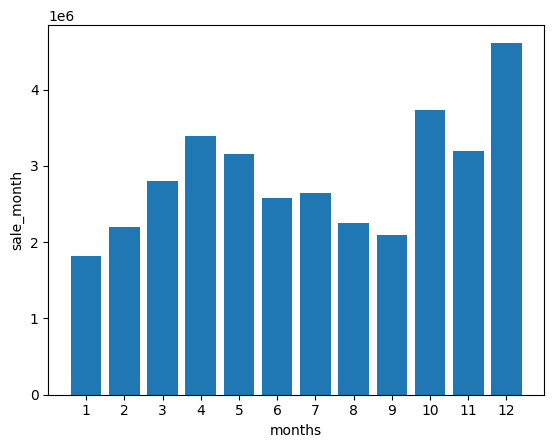

In [58]:
months=range(1,13)
plt.bar(x=months,height=sale_month)
plt.xticks(months)
plt.xlabel('months')
plt.ylabel('sale_month')
plt.show()

Task 3.2 Which city has the best sales?

In [59]:
#Merge City
adress='944 Walnut St, Boston, MA 02215'

def getcity(adress):
    return adress.split(',')[1]

df['city']=df['Purchase Address'].apply(getcity)



In [60]:
sale_city=df.groupby('city').sum()['productsale']
sale_city

C:\Users\DAT\AppData\Local\Temp\ipykernel_19888\1562123881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_city=df.groupby('city').sum()['productsale']


city
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: productsale, dtype: float32

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0.0, 0, ' Atlanta'),
  Text(1.0, 0, ' Austin'),
  Text(2.0, 0, ' Boston'),
  Text(3.0, 0, ' Dallas'),
  Text(4.0, 0, ' Los Angeles'),
  Text(5.0, 0, ' New York City'),
  Text(6.0, 0, ' Portland'),
  Text(7.0, 0, ' San Francisco'),
  Text(8.0, 0, ' Seattle')])

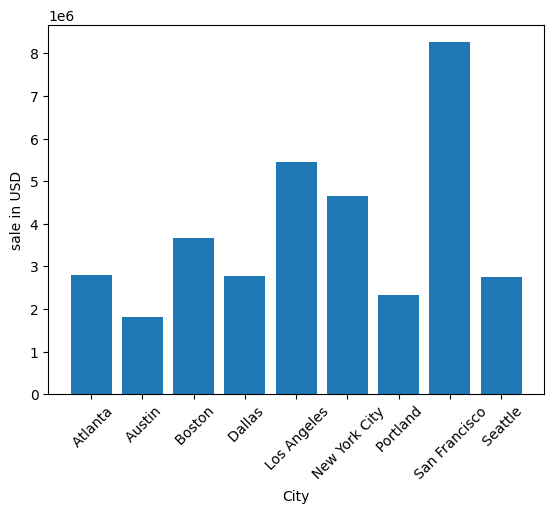

In [61]:
city=[city for city,productsale in sale_city.items()]
plt.bar(x=city,height=sale_city)
plt.xticks(city)
plt.xlabel('City')
plt.ylabel('sale in USD')
plt.show
plt.xticks(rotation=45)

Task 3.3 What time should we display ads to maximize the likehood of customer's buying product?

In [62]:
# Add order hour column
df['order hour']=df['Order Date'].str[9:11]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,productsale,city,order hour
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.970000,Los Angeles,20
11682,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000,San Francisco,16
11683,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.000000,San Francisco,07
11684,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.989990,San Francisco,17


In [63]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,productsale,city,order hour
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.970000,Los Angeles,20
11682,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000,San Francisco,16
11683,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.000000,San Francisco,07
11684,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.989990,San Francisco,17


In [64]:
sale_hour=df.groupby('order hour').sum()['productsale']
sale_hour

C:\Users\DAT\AppData\Local\Temp\ipykernel_19888\3146945293.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_hour=df.groupby('order hour').sum()['productsale']


order hour
00    7.137212e+05
01    4.608669e+05
02    2.348514e+05
03    1.457579e+05
04    1.626610e+05
05    2.306798e+05
06    4.481130e+05
07    7.448541e+05
08    1.192349e+06
09    1.639031e+06
10    1.944287e+06
11    2.300610e+06
12    2.316821e+06
13    2.155390e+06
14    2.083673e+06
15    1.941550e+06
16    1.904601e+06
17    2.129362e+06
18    2.219348e+06
19    2.412938e+06
20    2.281716e+06
21    2.042001e+06
22    1.607549e+06
23    1.179304e+06
Name: productsale, dtype: float32

In [65]:
hour=[order hour for order hour,productsale in sale_hour.items()]
plt.bar(x=hour,height=sale_hour)
plt.xticks(hour)
plt.xlabel('hour')
plt.ylabel('sale in USD')
plt.show
plt.xticks(rotation=45)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2392188002.py, line 1)

Task 3.4: What products are most often sold together?


In [ ]:
df_dup=df[df['Order ID'].duplicated(keep=False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,productsale,city,order hour
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,08
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,08
133,141365,Vareebadd Phone,1,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",09,3.84,Atlanta,20
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta,00
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,5.98,Atlanta,00
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",09,600.00,San Francisco,13


In [ ]:
def joinproduct(product):
    return ','.join

product=


In [ ]:
df['all products']=df_dup.groupby('Order ID')['Product'].apply(','.join)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,productsale,city,order hour,all products
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21,NaN
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14,NaN
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13,NaN
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20,NaN
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.970000,Los Angeles,20,NaN
11682,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000,San Francisco,16,NaN
11683,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.000000,San Francisco,07,NaN
11684,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.989990,San Francisco,17,NaN
